#MBA Business Analytics e Big Data
##Modelagem Preditiva Avançada
######Por: Ricardo Reis

######Case - Framingham Heart Study


#### Carrega Pacotes

In [0]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras import regularizers
from keras.layers import Dropout

In [2]:
import keras
print("keras version:", keras.__version__)

import tensorflow as tf
print("tensorflow version:", tf.__version__)

print("GPU support:", tf.test.is_gpu_available(cuda_only=False, min_cuda_compute_capability=None))

Using TensorFlow backend.


keras version: 2.3.1
tensorflow version: 2.2.0-rc3
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
GPU support: False


In [0]:
from keras import models, layers

####Leitura de Dados

In [0]:
df = pd.read_csv('/content/framingham.csv', sep = ',' )

In [5]:
df.head(5)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


#### Data Prep

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [7]:
#Checa Valores Nulos
df.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [6]:
#checa proporção da variável resposta
df['TenYearCHD'].value_counts(normalize=True) * 100

0    84.811321
1    15.188679
Name: TenYearCHD, dtype: float64

In [7]:
#Estratégia Adotada:
#Excluindo linhas com Missing Values
df = df.dropna()

print("Proporção da Variável Resposta", "\n", df['TenYearCHD'].value_counts(normalize=True) * 100, "\n\n")
print("Checa Valores Nulos", "\n", df.isna().sum())

Proporção da Variável Resposta 
 0    84.7731
1    15.2269
Name: TenYearCHD, dtype: float64 


Checa Valores Nulos 
 male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


In [0]:
#Separa Features da Variável Resposta
features = df.iloc[:,0:15]
labels = df.iloc[:,15]

In [0]:
#Cria Dataframes de Treino e Teste (Hold Out Validation)
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.3, random_state = 12345)

In [0]:
#Normalização dos Dados de Treino e Teste
mean = X_train.mean(axis=0)
X_train -= mean
std = X_train.std(axis=0)
X_train /= std

X_test -= mean
X_test /= std

In [0]:
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)
#X_train

####Artificial Neural Networks
Treinando 3 modelos.

##### Modelo 1
Arquitetura com 4 neurons.

In [0]:
model1 = models.Sequential()

In [0]:
# 1ª Camada
model1.add(layers.Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu', input_dim= 15))
# 2ª Camada Escondida
model1.add(layers.Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))
# Camada de Output
model1.add(layers.Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compilando a Rede
model1.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [0]:
history1 = model1.fit(X_train, y_train, validation_split=0.2, batch_size = 10, epochs = 300, verbose = 0)

In [14]:
history_dict1 = history1.history
history_dict1.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

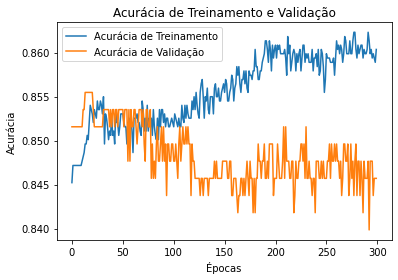

In [15]:
# Plot da Acurácia de Treinamento e Validação
plt.plot(history_dict1['accuracy'])
plt.plot(history_dict1['val_accuracy'])
plt.title('Acurácia de Treinamento e Validação')
plt.ylabel('Acurácia')
plt.xlabel('Épocas')
plt.legend(['Acurácia de Treinamento', 'Acurácia de Validação'], loc='upper left')
plt.show()

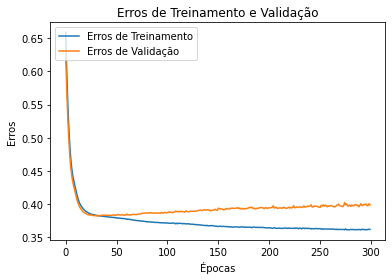

In [16]:
# Plot da Erros de Treinamento e Validação
plt.plot(history_dict1['loss'])
plt.plot(history_dict1['val_loss'])
plt.title('Erros de Treinamento e Validação')
plt.ylabel('Erros')
plt.xlabel('Épocas')
plt.legend(['Erros de Treinamento', 'Erros de Validação'], loc='upper left')
plt.show()

##### Modelo 2
Arquitetura com 8 neurons.

In [0]:
model2 = models.Sequential()

In [0]:
# 1ª Camada
model2.add(layers.Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim= 15))
# 2ª Camada Escondida
model2.add(layers.Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
# Camada de Output
model2.add(layers.Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compilando a Rede
model2.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [0]:
history2 = model2.fit(X_train, y_train, validation_split=0.2, batch_size = 10, epochs = 300, verbose = 0)

In [20]:
history_dict2 = history2.history
history_dict2.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

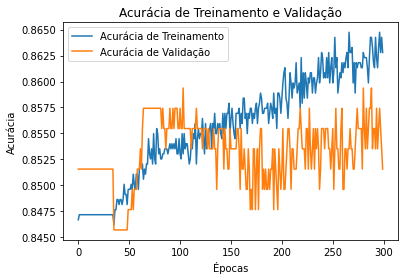

In [21]:
# Plot da Acurácia de Treinamento e Validação
plt.plot(history_dict2['accuracy'])
plt.plot(history_dict2['val_accuracy'])
plt.title('Acurácia de Treinamento e Validação')
plt.ylabel('Acurácia')
plt.xlabel('Épocas')
plt.legend(['Acurácia de Treinamento', 'Acurácia de Validação'], loc='upper left')
plt.show()

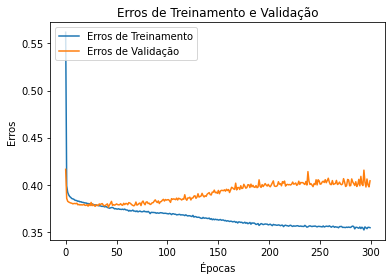

In [22]:
# Plot da Erros de Treinamento e Validação
plt.plot(history_dict2['loss'])
plt.plot(history_dict2['val_loss'])
plt.title('Erros de Treinamento e Validação')
plt.ylabel('Erros')
plt.xlabel('Épocas')
plt.legend(['Erros de Treinamento', 'Erros de Validação'], loc='upper left')
plt.show()

##### Modelo 3
Arquitetura com 16 neurons.

In [0]:
model3 = models.Sequential()

In [0]:
# 1ª Camada
model3.add(layers.Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu', input_dim= 15))
# 2ª Camada Escondida
model3.add(layers.Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
# Camada de Output
model3.add(layers.Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compilando a Rede
model3.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [0]:
history3 = model3.fit(X_train, y_train, validation_split=0.2, batch_size = 10, epochs = 300, verbose = 0)

In [26]:
history_dict3 = history3.history
history_dict3.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

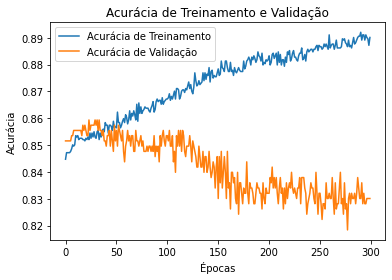

In [27]:
# Plot da Acurácia de Treinamento e Validação
plt.plot(history_dict3['accuracy'])
plt.plot(history_dict3['val_accuracy'])
plt.title('Acurácia de Treinamento e Validação')
plt.ylabel('Acurácia')
plt.xlabel('Épocas')
plt.legend(['Acurácia de Treinamento', 'Acurácia de Validação'], loc='upper left')
plt.show()

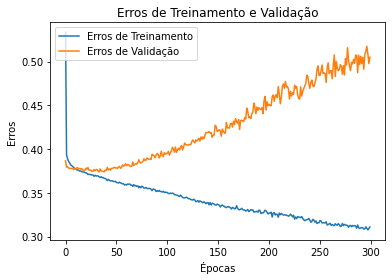

In [28]:
# Plot da Erros de Treinamento e Validação
plt.plot(history_dict3['loss'])
plt.plot(history_dict3['val_loss'])
plt.title('Erros de Treinamento e Validação')
plt.ylabel('Erros')
plt.xlabel('Épocas')
plt.legend(['Erros de Treinamento', 'Erros de Validação'], loc='upper left')
plt.show()

##### Teste

In [0]:
chosen_model = models.Sequential()

In [0]:
# 1ª Camada
chosen_model.add(layers.Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu', input_dim= 15))
# 2ª Camada Escondida
chosen_model.add(layers.Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))
# Camada de Output
chosen_model.add(layers.Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compilando a Rede
chosen_model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [0]:
history_chosen_model = chosen_model.fit(X_train, y_train, validation_split=0.2, batch_size = 10, epochs = 50, verbose = 0)

In [33]:
history_dict_chosen_model = history_chosen_model.history
history_dict_chosen_model.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

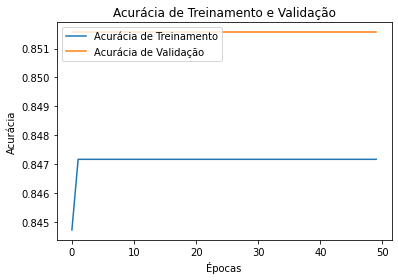

In [34]:
# Plot da Acurácia de Treinamento e Validação
plt.plot(history_dict_chosen_model['accuracy'])
plt.plot(history_dict_chosen_model['val_accuracy'])
plt.title('Acurácia de Treinamento e Validação')
plt.ylabel('Acurácia')
plt.xlabel('Épocas')
plt.legend(['Acurácia de Treinamento', 'Acurácia de Validação'], loc='upper left')
plt.show()

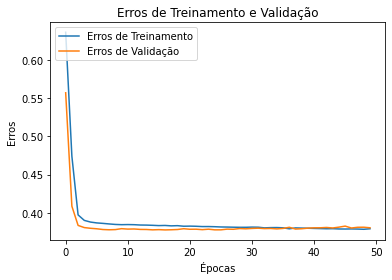

In [35]:
# Plot da Erros de Treinamento e Validação
plt.plot(history_dict_chosen_model['loss'])
plt.plot(history_dict_chosen_model['val_loss'])
plt.title('Erros de Treinamento e Validação')
plt.ylabel('Erros')
plt.xlabel('Épocas')
plt.legend(['Erros de Treinamento', 'Erros de Validação'], loc='upper left')
plt.show()

In [0]:
y_pred = chosen_model.predict(X_test)

In [0]:
threshold = 0.4
y_pred = (y_pred < threshold).astype(np.int)

In [132]:
confusion_matrix(y_test, y_pred)

array([[ 30, 900],
       [ 26, 142]])

In [135]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.54      0.03      0.06       930
           1       0.14      0.85      0.23       168

    accuracy                           0.16      1098
   macro avg       0.34      0.44      0.15      1098
weighted avg       0.47      0.16      0.09      1098



In [134]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
tn, fp, fn, tp

(30, 900, 26, 142)

In [113]:
results = model2.evaluate(X_test, y_test)
results

1098/1098 [==============================] - 0s 24us/step


[0.3962538012444213, 0.8433515429496765]

#### Adicionando Regularizador L2

In [0]:
model_l2 = models.Sequential()

In [0]:
# 1ª Camada
model_l2.add(layers.Dense(units = 4, kernel_initializer = 'uniform', kernel_regularizer = regularizers.l2(0.001), activation = 'relu', input_dim= 15))
# 2ª Camada
model_l2.add(layers.Dense(units = 4, kernel_initializer = 'uniform', kernel_regularizer = regularizers.l2(0.001), activation = 'relu'))
# Camada de Output
model_l2.add(layers.Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compilando a Rede
model_l2.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [0]:
history_l2 = model_l2.fit(X_train, y_train, validation_split=0.2, batch_size = 10, epochs = 200, verbose = 0)

In [142]:
history_dict_l2 = history_l2.history
history_dict_l2.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

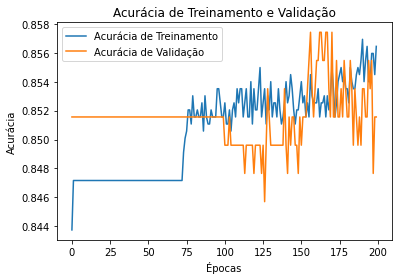

In [143]:
# Plot da Acurácia de Treinamento e Validação
plt.plot(history_dict_l2['accuracy'])
plt.plot(history_dict_l2['val_accuracy'])
plt.title('Acurácia de Treinamento e Validação')
plt.ylabel('Acurácia')
plt.xlabel('Épocas')
plt.legend(['Acurácia de Treinamento', 'Acurácia de Validação'], loc='upper left')
plt.show()

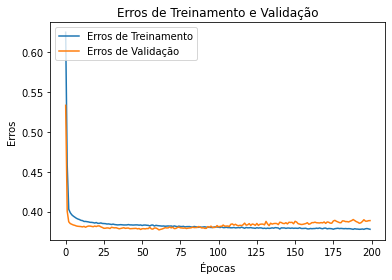

In [144]:
# Plot da Erros de Treinamento e Validação
plt.plot(history_dict_l2['loss'])
plt.plot(history_dict_l2['val_loss'])
plt.title('Erros de Treinamento e Validação')
plt.ylabel('Erros')
plt.xlabel('Épocas')
plt.legend(['Erros de Treinamento', 'Erros de Validação'], loc='upper left')
plt.show()

In [0]:
y_pred = model_l2.predict(X_test)

In [0]:
threshold = 0.4
y_pred = (y_pred < threshold).astype(np.int)

In [147]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.54      0.03      0.06       930
           1       0.14      0.86      0.24       168

    accuracy                           0.16      1098
   macro avg       0.34      0.44      0.15      1098
weighted avg       0.48      0.16      0.08      1098



In [255]:
results = model_l2.evaluate(X_test, y_test)
results

1098/1098 [==============================] - 0s 23us/step


[0.38762642549035325, 0.8524590134620667]

#### Adicionando Regularizador L2 + Drop Out

In [0]:
model_l2_dropout = models.Sequential()

In [0]:
# 1ª Camada
model_l2_dropout.add(layers.Dense(units = 8, kernel_initializer = 'uniform', kernel_regularizer = regularizers.l2(0.001), activation = 'relu', input_dim= 15))
model_l2_dropout.add(layers.Dropout(rate=0.2))
# 2ª Camada
model_l2_dropout.add(layers.Dense(units = 8, kernel_initializer = 'uniform', kernel_regularizer = regularizers.l2(0.001), activation = 'relu'))
model_l2_dropout.add(layers.Dropout(rate=0.2))
# Camada de Output
model_l2_dropout.add(layers.Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compilando a Rede
model_l2_dropout.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [0]:
history_l2_dropout = model_l2_dropout.fit(X_train, y_train, validation_split=0.2, batch_size = 10, epochs = 200, verbose = 0)

In [249]:
history_dict_l2_dropout = history_l2_dropout.history
history_dict_l2_dropout.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

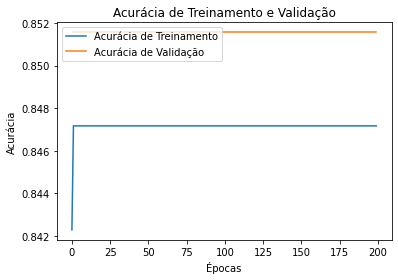

In [250]:
# Plot da Acurácia de Treinamento e Validação
plt.plot(history_dict_l2_dropout['accuracy'])
plt.plot(history_dict_l2_dropout['val_accuracy'])
plt.title('Acurácia de Treinamento e Validação')
plt.ylabel('Acurácia')
plt.xlabel('Épocas')
plt.legend(['Acurácia de Treinamento', 'Acurácia de Validação'], loc='upper left')
plt.show()

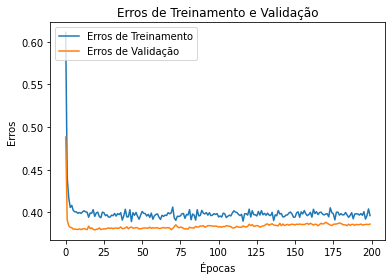

In [251]:
# Plot da Erros de Treinamento e Validação
plt.plot(history_dict_l2_dropout['loss'])
plt.plot(history_dict_l2_dropout['val_loss'])
plt.title('Erros de Treinamento e Validação')
plt.ylabel('Erros')
plt.xlabel('Épocas')
plt.legend(['Erros de Treinamento', 'Erros de Validação'], loc='upper left')
plt.show()

In [0]:
y_pred = model_l2_dropout.predict(X_test)

In [0]:
threshold = 0.4
y_pred = (y_pred < threshold).astype(np.int)

In [254]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       930
           1       0.15      1.00      0.27       168

    accuracy                           0.15      1098
   macro avg       0.08      0.50      0.13      1098
weighted avg       0.02      0.15      0.04      1098



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [256]:
results = model_l2_dropout.evaluate(X_test, y_test)
results

1098/1098 [==============================] - 0s 23us/step


[0.3956385743151163, 0.8469945192337036]